## Life cycle and infinite horizon problem with value functions calculated 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
from copy import copy 

In [2]:
from resources_jit import MeanOneLogNormal as lognorm
from SolveLifeCycleValueFunc import LifeCycle, solve_model_backward_iter_vfunc, solve_model_iter_vfunc

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)


In [4]:
## plot configuration 

plt.style.use('seaborn')
plt.rcParams["font.family"] = "Times New Roman" #'serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['axes.labelweight'] = 'bold'

## Set the 
plt.rc('font', size=25)
# Set the axes title font size
plt.rc('axes', titlesize=20)
# Set the axes labels font size
plt.rc('axes', labelsize=20)
# Set the font size for x tick labels
plt.rc('xtick', labelsize=20)
# Set the font size for y tick labels
plt.rc('ytick', labelsize=20)
# Set the legend font size
plt.rc('legend', fontsize=20)
# Set the font size of the figure title
plt.rc('figure', titlesize=20)

## Initialize the model

In [5]:
if __name__ == "__main__":


    ## parameters 
    ###################

    U = 0.2 ## transitory ue risk
    U0 = 0.0 ## transitory ue risk

    ## life cycle 

    T = 40
    L = 60
    G = np.ones(L)
    YPath = np.cumprod(G)

## Life-Cycle Problem 

In [6]:
if __name__ == "__main__":
    lc_paras = {'sigma_psi':0.15, # permanent 
                'sigma_eps': 0.03, #transitory
                'U':U,
                'ρ':2,
                'R':1.01,
                'T':T,
                'L':L,
                'G':G,
                'β':0.92,
                'x':0.0,  # no MA shock 
                'borrowing_cstr':False,
                'b_y':0.0, #no persistent state
                'unemp_insurance':0.15,
                'grid_max':3.0,
                'grid_size':100,
                'value_func':True,
               }

In [7]:
if __name__ == "__main__":
    lc = LifeCycle(**lc_paras)

### Consumption  the last period 

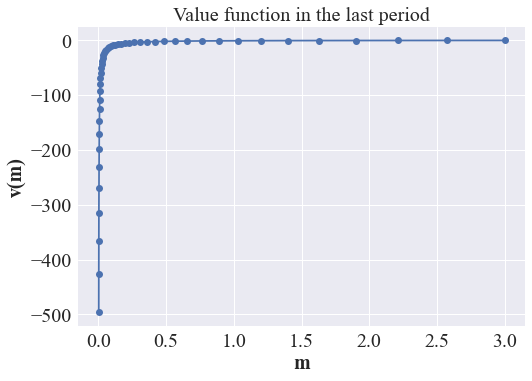

In [8]:
# Initial the end-of-period consumption policy of σ = consume all assets

if __name__ == "__main__":

    ## initial consumption functions 
    
    m_init,σ_init,v_init = lc.terminal_solution()
    plt.title('Value function in the last period')
    plt.plot(m_init[int(m_init.shape[0]/2):-1,1,1],
             v_init[int(m_init.shape[0]/2):-1,1,1],
            'o-')
    plt.xlabel('m')
    plt.ylabel('v(m)')

In [9]:
if __name__ == "__main__":

    t_start = time()

    ### this line is very important!!!!
    #### need to regenerate shock draws for new sigmas
    lc.prepare_shocks()

    ## terminal solution
    m_init,σ_init,v_init = lc.terminal_solution()

    ## solve backward
    ms_star_basic, σs_star_basic,vs_star_basic = solve_model_backward_iter_vfunc(lc,
                                                                         m_init,
                                                                         σ_init,
                                                                         v_init)

    t_finish = time()

    print("Time taken, in seconds: "+ str(t_finish - t_start))

/Users/tao/Dropbox/PIR/WorkingFolder/PythonCode/SolveLifeCycleValueFunc.py:456: NumbaDeprecationWarning: 
Fall-back from the nopython compilation path to the object mode compilation path has been detected, this is deprecated behaviour.

For more information visit https://numba.pydata.org/numba-doc/latest/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit

File "../../../../opt/anaconda3/envs/econ-ark/lib/python3.9/site-packages/interpolation/multilinear/mlinterp.py", line 39:
    if isinstance(u, UniTuple):
        def mlininterp(grid: Tuple, c: Array, u: Tuple)->float:
        ^

  v_tfunc_in = lambda m,ϵ,z: mlinterp((mϵ_in[:,0,z],
/Users/tao/Dropbox/PIR/WorkingFolder/PythonCode/SolveLifeCycleValueFunc.py:456: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "mlininterp" failed type inference due to: Internal error at <numba.core.typeinfer.CallConstraint object at 0x7fd0f1b34c10>.
'Optional' objec

Time taken, in seconds: 19.09557318687439


### Different permanent/transitory risk (no MA)

In [10]:
if __name__ == "__main__":
    lc_pt_paras = copy(lc_paras)
    
    lc_pt = LifeCycle(**lc_pt_paras)

In [11]:
if __name__ == "__main__":

    t_start = time()

    sigma_psi_ls = [0.03,0.2]
    sigma_eps_ls = [0.03,0.2]
    
    ms_stars =[]
    σs_stars = []
    vs_stars = []
    
    for i,sigma_psi in enumerate(sigma_psi_ls):
        lc_pt.sigma_psi = sigma_psi
        lc_pt.sigma_eps = sigma_eps_ls[i]
        ### this line is very important!!!!
        #### need to regenerate shock draws for new sigmas
        lc_pt.prepare_shocks()
        
        ## terminal solution
        m_init,σ_init,v_init = lc_pt.terminal_solution()
        
        ## solve backward
        ms_star, σs_star,vs_star = solve_model_backward_iter_vfunc(lc_pt,
                                                                     m_init,
                                                                     0.5*σ_init,
                                                                     v_init)
        ms_stars.append(ms_star)
        σs_stars.append(σs_star)
        vs_stars.append(vs_star)

    t_finish = time()

    print("Time taken, in seconds: "+ str(t_finish - t_start))

Time taken, in seconds: 32.858553886413574


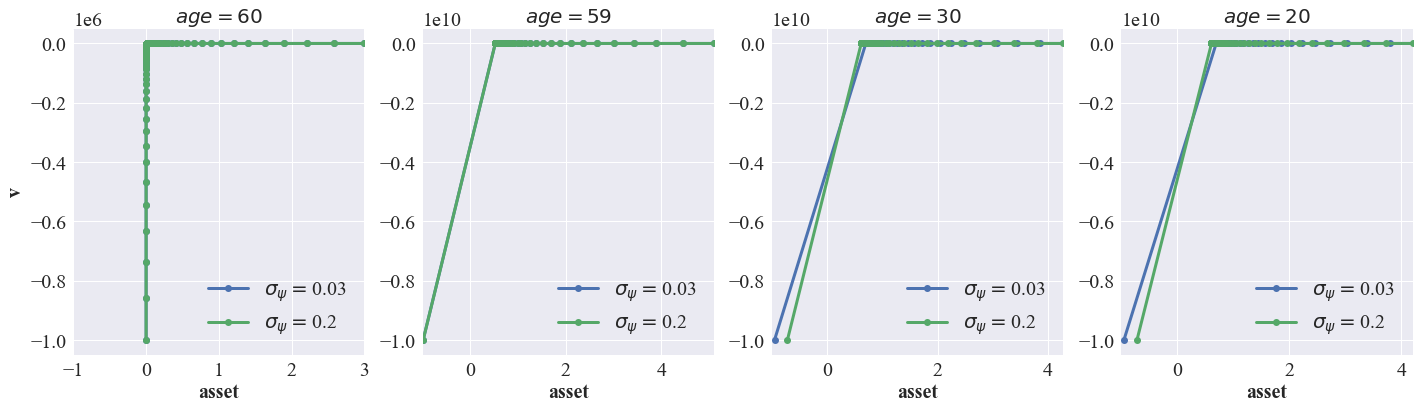

In [12]:
if __name__ == "__main__":


    ## plot c func at different age /asset grid
    years_left = [0,1,30,40]
    start_m_at = 0

    n_sub = len(years_left)

    eps_fix = 0 ## the first eps grid 

    fig,axes = plt.subplots(1,n_sub,figsize=(6*n_sub,6))

    for x,year in enumerate(years_left):
        age = lc_pt.L-year
        i = lc_pt.L-age
        for k,sigma_psi in enumerate(sigma_psi_ls):
            m_plt,v_plt = ms_stars[k][i,start_m_at:-1,eps_fix,0],vs_stars[k][i,start_m_at:-1,eps_fix,0]
            axes[x].plot(m_plt,
                         v_plt,
                        '-o',
                         label = r'$\sigma_\psi=$'+str(sigma_psi),
                         lw=3,
                        )
        axes[x].legend()
        axes[x].set_xlim(-1.0,np.max(m_plt))
        axes[x].set_xlabel('asset')
        axes[0].set_ylabel('v')
        axes[x].set_title(r'$age={}$'.format(age))

In [13]:
## the size of value function is  T x nb_a x nb_eps x nb_z 
if __name__ == "__main__":
    print(vs_star.shape)

(60, 100, 2, 2)


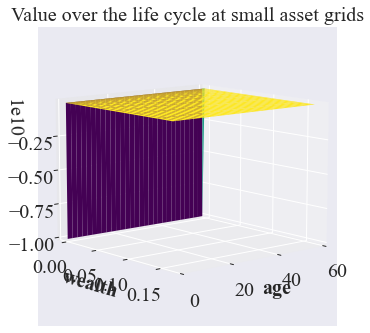

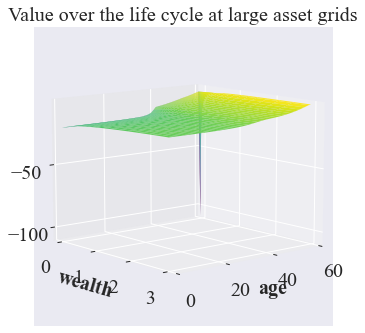

In [14]:
if __name__ == "__main__":

    ## plot 3d functions over life cycle 
    start_m_at = 0
    
    ages = np.array(range(ms_star.shape[0]))
    asset = ms_star[0,start_m_at:-20,0,0]
    xx, yy = np.meshgrid(ages, asset)
    v_stars = np.flip(vs_star[:,start_m_at:-20,0,0],axis=0).T

    fig = plt.figure()
    ax = fig.add_subplot(111, 
                         projection='3d')
    dem3d = ax.plot_surface(xx,
                            yy,
                            v_stars,
                            cmap="viridis"
                           )
    ax.set_xlim(60,0)
    ax.set_title('Value over the life cycle at small asset grids')
    ax.set_xlabel('age')
    ax.set_ylabel('wealth')
    ax.view_init(10, 50)
    plt.show()

 ## plot 3d functions over life cycle 
    start_m_at = 60
    
    ages = np.array(range(ms_star.shape[0]))
    asset = ms_star[0,start_m_at:-1,0,0]
    xx, yy = np.meshgrid(ages, asset)
    v_stars = np.flip(vs_star[:,start_m_at:-1,0,0],axis=0).T

    fig = plt.figure()
    ax = fig.add_subplot(111, 
                         projection='3d')
    dem3d = ax.plot_surface(xx,
                            yy,
                            v_stars,
                            cmap="viridis"
                           )
    ax.set_xlim(60,0)
    ax.set_title('Value over the life cycle at large asset grids')
    ax.set_xlabel('age')
    ax.set_ylabel('wealth')
    ax.view_init(10, 50)
    plt.show()

    #ax.set_zlim(-30,0)

## Infinite horizon problem

Error at iteration 50 is 0.06716294241290299.
Error at iteration 100 is 0.0035013653981685877.
Error at iteration 150 is 0.0002040395920239746.
Error at iteration 200 is 1.1965689367343657e-05.

Converged in 244 iterations.
Time taken, in seconds: 76.53252625465393


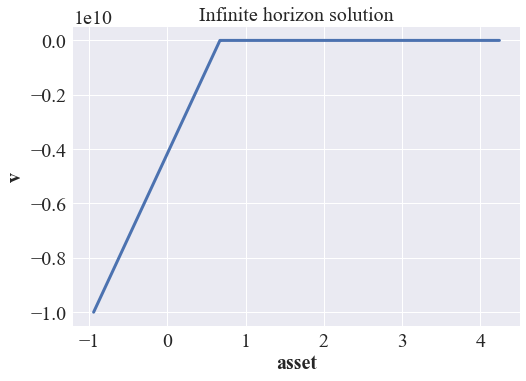

In [15]:
if __name__ == "__main__":
    
    inf_liv_paras = copy(lc_paras)
    
    ## initialize a model instance

    inf_liv = LifeCycle(**inf_liv_paras)


    ## initial guess of consumption functions 

    m_init,σ_init,v_init = inf_liv.terminal_solution()
   

    t_start = time()


    m_inf_star, σ_inf_star,v_inf_star = solve_model_iter_vfunc(inf_liv,
                                                              m_init,
                                                              σ_init,
                                                              v_init)

    t_finish = time()

    print("Time taken, in seconds: "+ str(t_finish - t_start))   


    ## plot v func 

    eps_fix = 0

    plt.plot(m_inf_star[0:-1,eps_fix,0],
             v_inf_star[0:-1,eps_fix,0],
             lw=3
            )
    plt.xlabel('asset')
    plt.ylabel('v')
    plt.title('Infinite horizon solution')

## Infinite horizon with adjustment inertia



Error at iteration 50 is 0.0011921910301140315.

Converged in 89 iterations.
Time taken, in seconds: 27.91372585296631


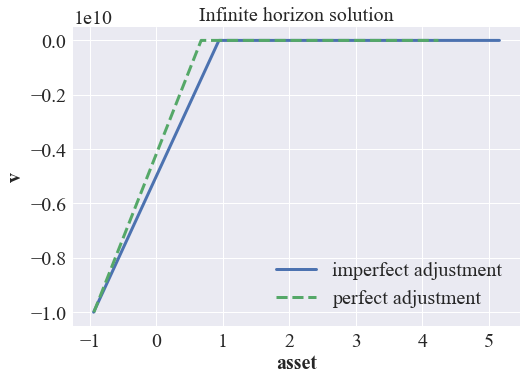

In [16]:
if __name__ == "__main__":


    ## Initialize a model instance
    imp_adjust_paras = copy(lc_paras)
    imp_adjust_paras['adjust_prob'] = 0.2
    
    imp_adjust = LifeCycle(**imp_adjust_paras)

    ## initial consumption functions 
    m_init,σ_init,v_init = imp_adjust.terminal_solution()

    t_start = time()


    ## set different ma parameters 
    m_imp_star, σ_imp_star, v_imp_star = solve_model_iter_vfunc(imp_adjust,
                                                              m_init,
                                                              σ_init,
                                                              v_init)


    t_finish = time()

    print("Time taken, in seconds: "+ str(t_finish - t_start))   


    ## plot c func at different age /asset grid

    eps_fix = 0

    plt.plot(m_imp_star[0:-1,eps_fix,1],
             v_imp_star[0:-1,eps_fix,1],
             '-',
             label = 'imperfect adjustment',
             lw=3
            )
    plt.plot(m_inf_star[0:-1,eps_fix,1],
             v_inf_star[0:-1,eps_fix,1],
             '--',
             label = 'perfect adjustment',
             lw=3
            )
    plt.legend()
    plt.xlabel('asset')
    plt.ylabel('v')
    plt.title('Infinite horizon solution')